## Home Credit Default RiskのEDA

目的としては、ローンの各申請者がどのようにローンを返済できるか、様々なユーザ属性を元にしてデータを眺めること

## ライブラリのインポート

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd .read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default = 'warn'

## 各ファイルを確認

In [2]:
from subprocess import check_output
print(check_output(["ls", "/Users/andoutakaaki/DIC_study/EDA_week3/all"]).decode("utf8"))

HomeCredit_columns_description.csv
POS_CASH_balance.csv
application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
installments_payments.csv
previous_application.csv
sample_submission.csv



## 各ファイルをインポート

In [3]:
POS_CASH_balance_df = pd.read_csv("./all/POS_CASH_balance.csv")
application_test_df = pd.read_csv("./all/application_test.csv")
application_train_df = pd.read_csv("./all/application_train.csv")
bureau_df = pd.read_csv("./all/bureau.csv")
bureau_balance_df = pd.read_csv("./all/bureau_balance.csv")
credit_card_balance_df = pd.read_csv("./all/credit_card_balance.csv")
installments_payments_df = pd.read_csv("./all/installments_payments.csv")
previous_application_df = pd.read_csv("./all/previous_application.csv")
sample_submission_df = pd.read_csv("./all/sample_submission.csv")

## 各ファイルのデータ数を把握

In [4]:
print('POS_CASH_balance_df',"{:,}".format(POS_CASH_balance_df.shape[0]))
print('application_test_df'   ,"{:,}".format(application_test_df.shape[0]))
print('application_train_df'   ,"{:,}".format(application_train_df.shape[0]))
print('bureau_df',"{:,}".format(bureau_df.shape[0]))
print('bureau_balance_df',"{:,}".format(bureau_balance_df.shape[0]))
print('credit_card_balance_df',"{:,}".format(credit_card_balance_df.shape[0]))
print('installments_payments_df',"{:,}".format(installments_payments_df.shape[0]))
print('previous_application_df',"{:,}".format(previous_application_df.shape[0]))
print('sample_submission_df',"{:,}".format(sample_submission_df.shape[0]))

POS_CASH_balance_df 10,001,358
application_test_df 48,744
application_train_df 307,511
bureau_df 1,716,428
bureau_balance_df 27,299,925
credit_card_balance_df 3,840,312
installments_payments_df 13,605,401
previous_application_df 1,670,214
sample_submission_df 48,744


## 各ファイルのデータ数をグラフで表示

<BarContainer object of 9 artists>

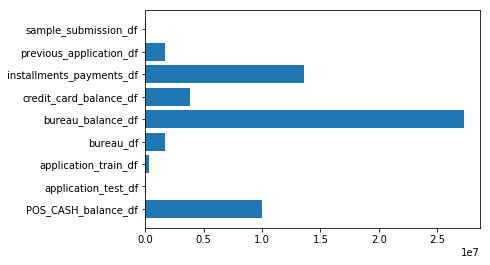

In [5]:
list = [POS_CASH_balance_df.shape[0]]
list.append(application_test_df.shape[0])
list.append(application_train_df.shape[0])
list.append(bureau_df.shape[0])
list.append(bureau_balance_df.shape[0])
list.append(credit_card_balance_df.shape[0])       
list.append(installments_payments_df.shape[0])
list.append(previous_application_df.shape[0])
list.append(sample_submission_df.shape[0])
#print(list)
plt.barh([
         'POS_CASH_balance_df',
         'application_test_df',
         'application_train_df',
         'bureau_df',
         'bureau_balance_df',
         'credit_card_balance_df',
         'installments_payments_df',
         'previous_application_df',
         'sample_submission_df'],list)

## 各ファイルのデータを表示

In [6]:
application_test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
application_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [9]:
bureau_balance_df.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
credit_card_balance_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [11]:
installments_payments_df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [12]:
previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sample_submission_df.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


## デフォルトしなかった人(0)、デフォルトした人(1)の数を表示

In [14]:
Target_count = application_train_df["TARGET"].value_counts()
Target_count

0    282686
1     24825
Name: TARGET, dtype: int64

## グラフで確認
デフォルトした人は8%

Text(0.5, 1.0, 'Ratio Defaulter')

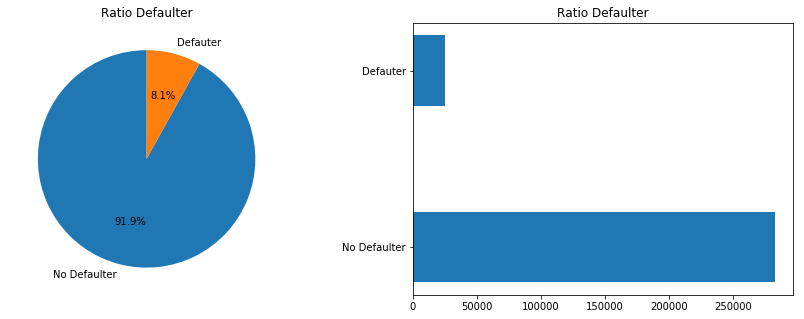

In [15]:
label = ["No Defaulter", "Defauter"]
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.pie(np.array(Target_count), labels=label, startangle=90, autopct="%1.1f%%") 
plt.title("Ratio Defaulter")

plt.subplot(1,2,2)
plt.barh(label, Target_count, height=0.4)
plt.title("Ratio Defaulter")

## 男女で分けた場合で確認
女性の方がデフォルト者が多い

In [16]:
Total = application_train_df["CODE_GENDER"].value_counts()

difficulties_df = application_train_df[(application_train_df["TARGET"] == 1)] 
other_cases_df = application_train_df[(application_train_df["TARGET"] == 0)] 

difficulties_gender = difficulties_df["CODE_GENDER"].value_counts()
other_cases_gender = other_cases_df["CODE_GENDER"].value_counts()

Text(0.5, 1.0, 'No Defaulter')

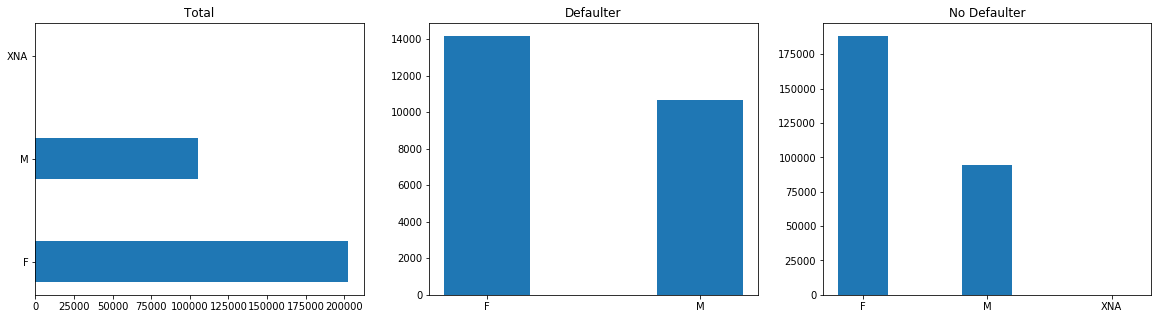

In [17]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.barh(Total.index, Total.values, height=0.4)
plt.title("Total")

plt.subplot(1,3,2)
plt.bar(difficulties_gender.index, difficulties_gender.values, width=0.4)
plt.title("Defaulter")

plt.subplot(1,3,3)
plt.bar(other_cases_gender.index, other_cases_gender.values, width=0.4)
plt.title("No Defaulter")

## 平均収入で分けた場合を確認
収入による差はあまりない

[169077.72226581787, 165611.76090634443]


Text(0.5, 1.0, 'Income_maen')

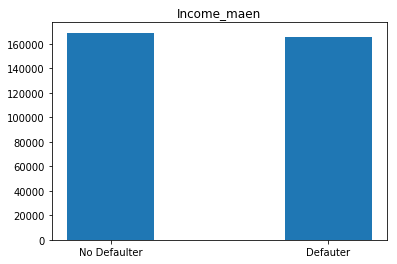

In [18]:
Defaulter_Income_maen = difficulties_df["AMT_INCOME_TOTAL"].mean()

No_Defaulter_Income_maen = other_cases_df["AMT_INCOME_TOTAL"].mean()

Income_maen = []
Income_maen += [No_Defaulter_Income_maen, Defaulter_Income_maen]

print(Income_maen)

plt.bar(label, Income_maen, width=0.4)
plt.title("Income_maen")

## 子供の人数で分けた場合を確認
明確な差はなかった

No Defaulter CHILDREN
0     198762
1      55665
2      24416
3       3359
4        374
5         77
6         15
7          7
14         3
19         2
12         2
10         2
8          2
Name: CNT_CHILDREN, dtype: int64
Defaulter CHILDREN
0     16609
1      5454
2      2333
3       358
4        55
5         7
6         6
9         2
11        1
Name: CNT_CHILDREN, dtype: int64


Text(0.5, 1.0, 'Defaulter CHILDREN')

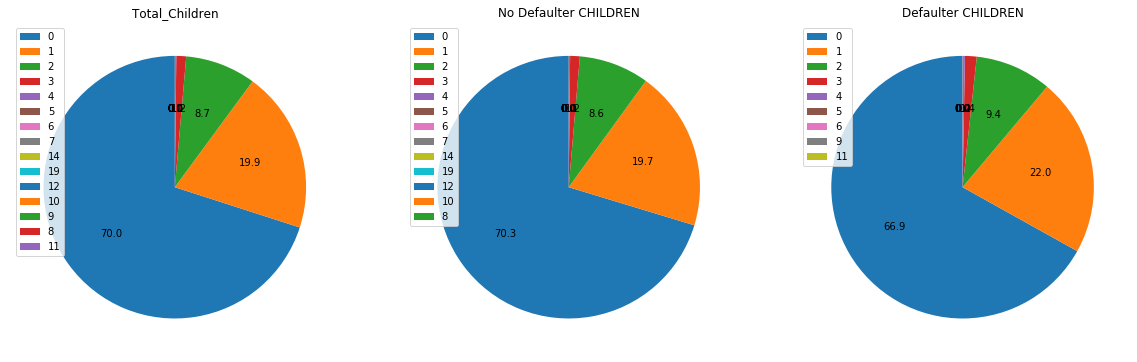

In [19]:
Total_Children = application_train_df["CNT_CHILDREN"].value_counts()
Defaulter_Children = difficulties_df["CNT_CHILDREN"].value_counts()
No_Defaulter_children = other_cases_df["CNT_CHILDREN"].value_counts()

print("No Defaulter CHILDREN")
print(No_Defaulter_children)
print("================================================")
print("Defaulter CHILDREN")
print(Defaulter_Children)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.pie(Total_Children.values, startangle=90, autopct="%.1f")
plt.legend(Total_Children.index)
plt.title("Total_Children")

plt.subplot(1,3,2)
plt.pie(No_Defaulter_children.values, startangle=90, autopct="%.1f")
plt.legend(No_Defaulter_children.index)
plt.title("No Defaulter CHILDREN")

plt.subplot(1,3,3)
plt.pie(Defaulter_Children.values, startangle=90, autopct="%.1f")
plt.legend(Defaulter_Children.index)
plt.title("Defaulter CHILDREN")

## ターゲットの相関を調査

In [20]:
cor = application_train_df.corr()['TARGET'].abs().nlargest(10)

In [21]:
cor

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

## ターゲットの相関を表示
この結果から、EXT_SOURCEの３つと相関が高いことが分かった

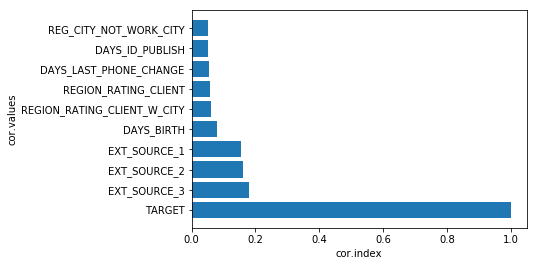

In [22]:
x = cor.index
y = cor.values

plt.xlabel('cor.index')
plt.ylabel('cor.values')
cor = application_train_df.corr

plt.barh(x, y, align='center')          # 中央寄せで棒グラフ作成
plt.show()


## EXT_SOURCE_3との相関を他のファイルで調査

In [23]:
cor = application_train_df.corr()['EXT_SOURCE_3'].abs().nlargest(10)

In [24]:
cor

EXT_SOURCE_3              1.000000
DAYS_BIRTH                0.205478
EXT_SOURCE_1              0.186846
TARGET                    0.178919
DAYS_ID_PUBLISH           0.131597
FLAG_EMP_PHONE            0.115293
DAYS_EMPLOYED             0.113434
EXT_SOURCE_2              0.109167
DAYS_REGISTRATION         0.107549
REG_CITY_NOT_WORK_CITY    0.079729
Name: EXT_SOURCE_3, dtype: float64

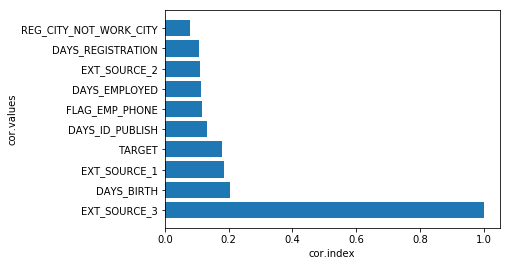

In [25]:
x = cor.index
y = cor.values

plt.xlabel('cor.index')
plt.ylabel('cor.values')
cor = application_train_df.corr

plt.barh(x, y, align='center')          # 中央寄せで棒グラフ作成
plt.show()

## EXT_SOURCE_2との相関を他のファイルで調査

In [26]:
cor = application_train_df.corr()['EXT_SOURCE_2'].abs().nlargest(10)

In [27]:
cor

EXT_SOURCE_2                   1.000000
REGION_RATING_CLIENT           0.292895
REGION_RATING_CLIENT_W_CITY    0.288299
EXT_SOURCE_1                   0.213982
REGION_POPULATION_RELATIVE     0.198924
DAYS_LAST_PHONE_CHANGE         0.195764
TARGET                         0.160472
HOUR_APPR_PROCESS_START        0.156863
AMT_GOODS_PRICE                0.139367
FLOORSMAX_AVG                  0.135863
Name: EXT_SOURCE_2, dtype: float64

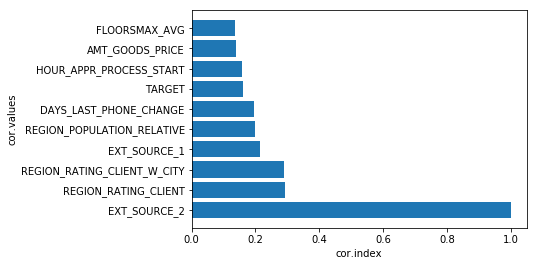

In [28]:
x = cor.index
y = cor.values

plt.xlabel('cor.index')
plt.ylabel('cor.values')
cor = application_train_df.corr

plt.barh(x, y, align='center')          # 中央寄せで棒グラフ作成
plt.show()

## EXT_SOURCE_1との相関を他のファイルで調査

In [29]:
cor = application_train_df.corr()['EXT_SOURCE_1'].abs().nlargest(10)

In [30]:
cor

EXT_SOURCE_1              1.000000
DAYS_BIRTH                0.600610
FLAG_EMP_PHONE            0.294147
DAYS_EMPLOYED             0.289848
EXT_SOURCE_2              0.213982
FLAG_DOCUMENT_6           0.190874
EXT_SOURCE_3              0.186846
REG_CITY_NOT_WORK_CITY    0.185953
DAYS_REGISTRATION         0.181095
AMT_GOODS_PRICE           0.175502
Name: EXT_SOURCE_1, dtype: float64

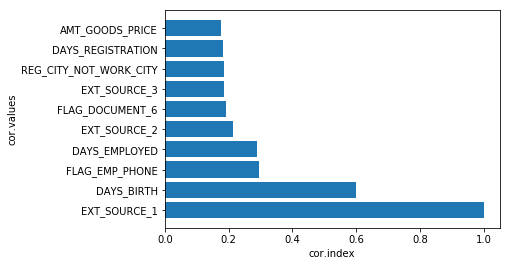

In [31]:
x = cor.index
y = cor.values

plt.xlabel('cor.index')
plt.ylabel('cor.values')
cor = application_train_df.corr

plt.barh(x, y, align='center')          # 中央寄せで棒グラフ作成
plt.show()